# Assignment 3
## Part 1


For this problem you will experiment with linear regression models to make predictions with numerical data. You will also explore mosre systematic methods for feature selection and for optimizing model parameters (model selection). The data set you will use is a subset of the "Communities and Crime" data set that combines information from the 1990 census data as well as FBI crime data from 1995. Please read the full description of the data, including the description and statistics on different variables. The target attribute for regression purposes is "ViolentCrimesPerPop". The two identifier attributes "state" and "community name" should be excluded for the regression task.

Your tasks in this problem are the following [Note: for these tasks you will use the available linear-models from scikit-learn as well as the implementations of the relevant approaches from the Ch. 8 of MLA] .

### Part a 

Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression.

In [2]:
import pandas as pd 
import numpy as np
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import pylab as pl

In [30]:
df_crime = pd.read_csv('E:/OneDrive/MSPA/CSC 478/Assignment/Assignment 3/communities/communities.csv' , na_values=["?"])

In [31]:
df_crime.shape

(1994, 100)

In [32]:
df_crime.isnull().sum()

state                    0
communityname            0
population               0
householdsize            0
racepctblack             0
racePctWhite             0
racePctAsian             0
racePctHisp              0
agePct12t21              0
agePct12t29              0
agePct16t24              0
agePct65up               0
numbUrban                0
pctUrban                 0
medIncome                0
pctWWage                 0
pctWFarmSelf             0
pctWInvInc               0
pctWSocSec               0
pctWPubAsst              0
pctWRetire               0
medFamInc                0
perCapInc                0
whitePerCap              0
blackPerCap              0
indianPerCap             0
AsianPerCap              0
OtherPerCap              1
HispPerCap               0
NumUnderPov              0
                        ..
MedNumBR                 0
HousVacant               0
PctHousOccup             0
PctHousOwnOcc            0
PctVacantBoarded         0
PctVacMore6Mos           0
M

In [33]:
df_crime[df_crime.OtherPerCap.isnull()]

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
130,28,Natchezcity,0.02,0.38,0.98,0.22,0.01,0.01,0.44,0.4,...,0.0,0.01,0.84,0.7,0.83,0.77,0.04,0.12,0.05,0.23


In [34]:
OPC_mean = df_crime.OtherPerCap.mean()
df_crime.OtherPerCap.fillna(OPC_mean, axis = 0, inplace = True)

In [35]:
df_crime.isnull().sum()

state                    0
communityname            0
population               0
householdsize            0
racepctblack             0
racePctWhite             0
racePctAsian             0
racePctHisp              0
agePct12t21              0
agePct12t29              0
agePct16t24              0
agePct65up               0
numbUrban                0
pctUrban                 0
medIncome                0
pctWWage                 0
pctWFarmSelf             0
pctWInvInc               0
pctWSocSec               0
pctWPubAsst              0
pctWRetire               0
medFamInc                0
perCapInc                0
whitePerCap              0
blackPerCap              0
indianPerCap             0
AsianPerCap              0
OtherPerCap              0
HispPerCap               0
NumUnderPov              0
                        ..
MedNumBR                 0
HousVacant               0
PctHousOccup             0
PctHousOwnOcc            0
PctVacantBoarded         0
PctVacMore6Mos           0
M

In [37]:
df_crime.describe().T

,count,mean,std,min,25%,50%,75%,max
state,1994.0,28.683551,16.397553,1.0,12.0000,34.000,42.0000,56.0
population,1994.0,0.057593,0.126906,0.0,0.0100,0.020,0.0500,1.0
householdsize,1994.0,0.463395,0.163717,0.0,0.3500,0.440,0.5400,1.0
racepctblack,1994.0,0.179629,0.253442,0.0,0.0200,0.060,0.2300,1.0
racePctWhite,1994.0,0.753716,0.244039,0.0,0.6300,0.850,0.9400,1.0
racePctAsian,1994.0,0.153681,0.208877,0.0,0.0400,0.070,0.1700,1.0
racePctHisp,1994.0,0.144022,0.232492,0.0,0.0100,0.040,0.1600,1.0
agePct12t21,1994.0,0.424218,0.155196,0.0,0.3400,0.400,0.4700,1.0
agePct12t29,1994.0,0.493867,0.143564,0.0,0.4100,0.480,0.5400,1.0
agePct16t24,1994.0,0.336264,0.166505,0.0,0.2500,0.290,0.3600,1.0


In [38]:
df_crime = df_crime.reindex(np.random.permutation(df_crime.index))

In [39]:
df_crime.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
717,29,BlueSpringscity,0.05,0.60,0.05,0.94,0.06,0.03,0.51,0.51,...,0.0,0.04,0.64,0.38,0.67,0.60,0.04,0.21,0.03,0.09
1266,34,Rockawaytownship,0.02,0.53,0.03,0.91,0.22,0.06,0.34,0.43,...,0.0,0.27,0.59,0.70,0.68,0.75,0.12,0.04,0.13,0.07
123,45,Mauldincity,0.00,0.45,0.28,0.76,0.06,0.02,0.43,0.48,...,0.0,0.04,0.48,0.43,0.53,0.36,0.02,0.14,0.00,0.09
1261,13,Bainbridgecity,0.00,0.45,0.92,0.27,0.01,0.03,0.48,0.48,...,0.0,0.06,0.77,0.58,0.71,0.68,0.04,0.06,0.00,0.41
460,13,Covingtoncity,0.00,0.49,0.89,0.30,0.01,0.02,0.47,0.51,...,0.0,0.02,0.93,0.64,0.79,0.89,0.03,0.07,0.04,0.55


In [40]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(df_crime, test_size = 0.2, random_state =42)

print train.shape
print test.shape

(1595, 100)
(399, 100)


In [41]:
y_train = np.array(train.ViolentCrimesPerPop)
print len(y_train)
y_test = np.array(test.ViolentCrimesPerPop)
print len(y_test)

1595
399


In [42]:
X_train = (train.drop(['state', 'communityname', 'ViolentCrimesPerPop'],  axis = 1))
x_train = np.array(X_train)
X_test = (test.drop(['state', 'communityname', 'ViolentCrimesPerPop'],  axis = 1))
x_test = np.array(X_test)

print x_train.shape
print x_test.shape

(1595L, 97L)
(399L, 97L)


In [43]:
# In order to do multiple regression we need to add a column of 1s for x0
x_train = np.array([np.concatenate((v,[1])) for v in x_train])
x_test = np.array([np.concatenate((v,[1])) for v in x_test])

print x_train.shape
print x_test.shape

(1595L, 98L)
(399L, 98L)


### Part b

Perform standard linear regression on data using the implementation for Ch. 8 of MLA. Compute the RMSE value on the full training data. Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights). Finally, perform 10-fold cross-validation using the learned model and compare the final RMSE to the training RMSE (for cross validation, you may use the KFold module from sklearn.cross_validation).

In [44]:
from numpy import *
def standRegres(xArr,yArr):
    xMat = mat(xArr); yMat = mat(yArr).T
    xTx = xMat.T*xMat
    if linalg.det(xTx) == 0.0:
        print "This matrix is singular, cannot do inverse"
        
    ws = xTx.I * (xMat.T*yMat)
    yHat = xMat * ws
    return ws, yHat

In [49]:
coef_reg, pred_reg = standRegres(x_train,y_train)

In [50]:
print 'The Length of Co-efficients is', len(coef_reg)
print 'The Length of Predicted Value is', len(pred_reg)

The Length of Co-efficients is 98
The Length of Predicted Value is 1595


In [51]:
print 'The weights are as follows: \n', coef_reg

The weights are as follows: 
[[-0.1451723 ]
 [-0.09651162]
 [ 0.17617614]
 [-0.07136887]
 [-0.02995368]
 [ 0.03001176]
 [ 0.19853757]
 [-0.11610078]
 [-0.33545959]
 [ 0.07506008]
 [ 0.10054567]
 [ 0.03646876]
 [-0.24089802]
 [-0.12968467]
 [ 0.05142602]
 [-0.14452252]
 [ 0.09798411]
 [ 0.08094728]
 [-0.12258675]
 [ 0.29226596]
 [-0.15716204]
 [-0.03873188]
 [-0.00711965]
 [-0.0360012 ]
 [ 0.02361456]
 [ 0.04388271]
 [ 0.02574207]
 [ 0.18597447]
 [-0.1898448 ]
 [-0.11009686]
 [ 0.08266759]
 [ 0.08231677]
 [-0.00441128]
 [ 0.15645004]
 [-0.05148172]
 [ 0.01143498]
 [ 0.75701364]
 [ 0.27100172]
 [ 0.59835284]
 [-1.25634933]
 [-0.10487486]
 [ 0.11424366]
 [-0.25206895]
 [-0.08781935]
 [ 0.00208596]
 [ 0.0688081 ]
 [-0.17551885]
 [-0.2107483 ]
 [ 0.14545898]
 [-0.14635769]
 [ 0.0141314 ]
 [ 0.01777878]
 [-0.08629567]
 [ 0.09321699]
 [-0.01224361]
 [-0.2678026 ]
 [ 0.61504845]
 [-0.38577438]
 [ 0.01599855]
 [-0.08009237]
 [-0.09217125]
 [-0.05632696]
 [ 0.4224959 ]
 [ 0.14984156]
 [-0.260233

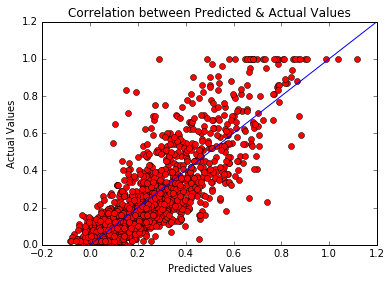

In [52]:
%matplotlib inline
pl.plot( pred_reg,y_train, 'ro')
pl.plot([0,1.2],[0,1.2])
pl.xlabel('Predicted Values')
pl.ylabel('Actual Values')
pl.title('Correlation between Predicted & Actual Values')

In [53]:
df_delete = pd.DataFrame(pred_reg, columns = ['Predicted'])
y_pred_train = np.array(df_delete.Predicted)

err_train = abs(y_pred_train - y_train)
err_train

tot_err_train = dot(err_train, err_train)
rmse_train = np.sqrt(tot_err_train/len(y_pred_train))

print 'The RMSE for training set is ', (rmse_train)

The RMSE for training set is  0.125447624284


In [54]:
kf  = KFold(len(x_train), n_folds = 10)

for train, test in kf:
    
    coef_reg, pred_reg = standRegres(x_train[train],y_train[train])
    
    pred_test = x_train[test] * coef_reg 
    df_delete = pd.DataFrame(pred_test, columns = ['Predicted'])
    y_pred_train = np.array(df_delete.Predicted)
    err = abs(y_pred_train - y_train[test])
    tot_err = dot(err, err)

rmse_train_cf = np.sqrt(tot_err/len(x_train))
print 'The RMSE for cross-validation is', rmse_train_cf

The RMSE for cross-validation is 0.0412214437076


In [55]:
print 'The RMSE for training data is ' , rmse_train
print 'The RMSE for training data using 10-Fold Cross Validation is ', rmse_train_cf

The RMSE for training data is  0.125447624284
The RMSE for training data using 10-Fold Cross Validation is  0.0412214437076


### Part c

Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function to takes as input the training data and target attribute, the model, and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights [Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). Next, plot the model's mean absolute error values  on cross-validation relative to the percentage of selected features (See scikit-learn's metrics.mean_absolute_error). In order to use cross_validation.cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. Once, you have determined the best set of features, run the model with that feature subset on the set-aside test data.  [Hint: for an example of a similar feature selection process please review the class example notebook. Also, review scikit-learn documentation for feature selection.]

In [56]:
from sklearn import feature_selection

The Optimal Percentage of Features are:36
The Optimal number of Features are: 34


C:\Users\Taha\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
C:\Users\Taha\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
C:\Users\Taha\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


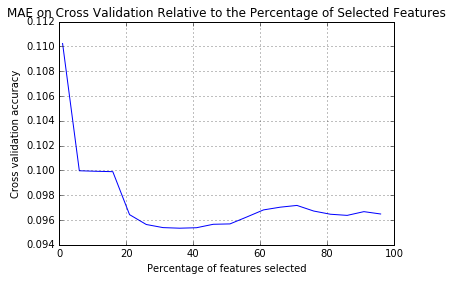

In [59]:
from sklearn import cross_validation

percentiles = range(1,100,5)
results = []
for i in range(1,100,5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs = fs.fit_transform(x_train,y_train)
    scores = abs(cross_validation.cross_val_score(LinearRegression(), X_train_fs, y_train, cv = 5, scoring= 'mean_absolute_error'))
    results = np.append(results, scores.mean())
    
optimal_percentile = np.where(results == results.min())[0]
opt_percentile = (percentiles[optimal_percentile])
print 'The Optimal Percentage of Features are:{0}'.format(percentiles[optimal_percentile])
optimal_num = int(floor(percentiles[optimal_percentile]*len(X_train.columns)/100))
print 'The Optimal number of Features are:', optimal_num 
        
#Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results) 
pl.grid()
pl.title('MAE on Cross Validation Relative to the Percentage of Selected Features')
pl.show()

In [60]:
O_fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile= 36)
O_train_fs = O_fs.fit_transform(x_train,y_train)
for j in range(len(X_train.columns.values)):
    if O_fs.get_support()[j]:
        print X_train.columns.values[j],'\t\t\t\t', O_fs.scores_[j]

population 				250.135890629
racepctblack 				1018.58371634
racePctWhite 				1462.8425102
numbUrban 				242.474263648
medIncome 				340.223686897
pctWInvInc 				787.808901851
pctWPubAsst 				846.419000565
medFamInc 				366.749748253
perCapInc 				226.265517805
NumUnderPov 				410.26261051
PctPopUnderPov 				616.389971786
PctLess9thGrade 				341.301506211
PctNotHSGrad 				491.811561178
PctUnemployed 				596.702802239
MalePctDivorce 				566.482707373
FemalePctDiv 				682.782072864
TotalPctDiv 				662.96707423
PctFam2Par 				1538.63855071
PctKids2Par 				1854.89147897
PctYoungKids2Par 				1265.73718643
PctTeen2Par 				1180.17590862
NumIlleg 				465.481682055
PctIlleg 				1919.79474986
PctLargHouseFam 				291.036963266
PctPersOwnOccup 				613.050701434
PctPersDenseHous 				470.064124585
PctHousLess3BR 				464.824659872
MedNumBR 				241.151345099
HousVacant 				351.558045643
PctHousOwnOcc 				452.262770439
PctVacantBoarded 				448.14969233
PctHousNoPhone 				474.259014353
PctWOFullPlumb 			

### Part d 
Next, perform Ridge Regression and Lasso Regression, however this time use the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. First, create a 20%-80% randomized split of the data. Set aside the test portion; the model selection process should be performed using the 80% training data partition. You should create a function that takes as input the data and target attribute; the parameter to vary and a list of its values, the model to be trained, and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). You should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally, using the best alpha value, run the model on the set-aside test data. Discuss your observation and conclusions. [Hint: for an example of a similar model selection process please review the class example notebook.]

In [64]:
def Ridge_Lasso(x,y, test_x, test_y, parameter, list_of_values, model, k):

    t_dict = {}
    cv_dict = {}  
    if model == 'Ridge':
        for value in list_of_values:
            ridge = Ridge(fit_intercept= True, alpha = value)
            ridge.fit(x,y)
            p = ridge.predict(x)
            err = p-y
            total_error = np.dot(err,err)
            rmse_train = np.sqrt(total_error/len(p))
            t_dict[value] = t_dict.get(value, rmse_train) 
            
            kf = KFold(len(x), n_folds = k)
            x_val_err = 0
            for train,test in kf:
                ridge.fit(x[train], y[train])
                p = ridge.predict(x[test])
                err = p - y[test]
                x_val_err += np.dot(err,err)
            rmse_cv = np.sqrt(x_val_err/len(x))
            #t_rmse = np.append(t_rmse, [rmse_train])
            #cv_rmse = np.append(cv_rmse, [rmse_cv])
            cv_dict[value] = cv_dict.get(value,  rmse_cv )
        #return t_rmse, cv_rmse
        #return ('{:.3f}\t {:.4f} \t\t {:.4f}'.format(value,rmse_train,rmse_cv))
    elif  model == 'Lasso':
        for value in list_of_values:
            lasso = Lasso(fit_intercept=True, alpha = value)
            lasso.fit(x,y)
            p = lasso.predict(x)
            err = p - y
            total_error = np.dot(err,err)
            rmse_train = np.sqrt(total_error/len(p))
            t_dict[value] = t_dict.get(value, rmse_train) 
            
            kf = KFold(len(x), n_folds = k)
            x_val_err = 0
            for train,test in kf:
                lasso.fit(x[train], y[train])
                p = lasso.predict(x[test])
                err = p - y[test]
                x_val_err += np.dot(err,err)
            rmse_cv = np.sqrt(x_val_err/len(x))
    
            #t_rmse = np.append(t_rmse, [rmse_train])
            #cv_rmse = np.append(cv_rmse, [rmse_cv])
            cv_dict[value] = cv_dict.get(value,  rmse_cv )
    



    from collections import defaultdict
    compl_dict = defaultdict(list)

    for d in (t_dict, cv_dict): # you can list as many input dicts as you want here
        for key, value in d.iteritems():
            compl_dict[key].append(value)

            
    df_complete = pd.DataFrame(compl_dict.values(), columns = ['Training_RMSE', 'CV_RMSE'])
    df_complete['Alpha'] = compl_dict.keys()
    df_complete = df_complete.sort_values(by = 'Alpha', axis =0)
    
    alpha  =  df_complete.Alpha
    TRMSE = df_complete.Training_RMSE
    CVRMSE = df_complete.CV_RMSE
    
    Tr_RMSE = df_complete.loc[df_complete.Training_RMSE == df_complete.Training_RMSE.min()]
    Tr_Al = Tr_RMSE.iloc[0][0]
    
    CV_RMSE = df_complete.loc[df_complete.CV_RMSE == df_complete.CV_RMSE.min()]
    CV_Al = CV_RMSE.iloc[0][0]
    
    if model == 'Ridge':
        ridge = Ridge(fit_intercept= True, alpha = Tr_Al)
        ridge.fit(test_x,test_y)
        p_test = ridge.predict(test_x)
    elif model == 'Lasso':
        lasso = Lasso(fit_intercept=True, alpha = Tr_Al)
        lasso.fit(test_x,test_y)
        p_test = lasso.predict(test_x)
    err_test = p_test - y_test
    total_error_test = np.dot(err_test,err_test)
    rmse_test = np.sqrt(total_error/len(p))
    
    
    pl.plot(alpha, TRMSE, label = 'RMSE - Training')
    pl.plot(alpha, CVRMSE, label = 'RMSE - Cross Validation')
    pl.xlabel('Alpha')
    pl.ylabel('RMSE')
    pl.legend()
    pl.legend( loc = 'lower right')
    pl.show()
    #return Tr_Al, CV_Al
    print 'The value of Alpha for Training is', Tr_Al,'\n', 'The value of Alpha for Testing is ', CV_Al
    print 'The RMSE for Testing Set is ', rmse_test

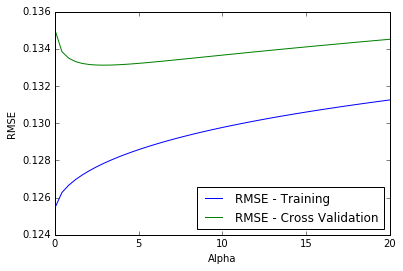

The value of Alpha for Training is 0.125468688002 
The value of Alpha for Testing is  0.127821510326
The RMSE for Testing Set is  0.293483158315


In [65]:
lst = np.linspace(0.01,20, 50)

#list_of_values
Ridge_Lasso(x_train,y_train, x_test, y_test, 'alpha', lst, 'Ridge', 5)
#Ridge_Lasso(x,y, parameter, list_of_values, model, k)

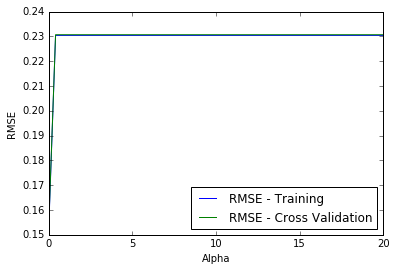

The value of Alpha for Training is 0.152521381033 
The value of Alpha for Testing is  0.152521381033
The RMSE for Testing Set is  0.515197127618


In [66]:
lst = np.linspace(0.01,20, 50)

#list_of_values
Ridge_Lasso(x_train,y_train, x_test, y_test, 'alpha', lst, 'Lasso', 5)
#Ridge_Lasso(x,y, parameter, list_of_values, model, k)

Based on this, we can see that the RMSE for Lasso remains constant, whereas for Ridge, we can see that there is a difference between the RMSE of training and cross validation. 

### Part e

Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use the SGDRegessor module from sklearn.linear_model. Again, start with creating randomized 80%-20% train-test split. SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values). Using the best parameters, apply the model to the set-aside test data. Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a summary of your findings from the above experiments.

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_s_train = scaler.transform(x_train)
x_s_test = scaler.transform(x_test)

sgdreg = SGDRegressor(penalty= 'l2', alpha=0.15, n_iter=200)
sgdreg.fit(x_s_train, y_train)
p_s_train = sgdreg.predict(x_s_train)

err_train = p_s_train-y_train
tot_err_train = np.dot(err_train,err_train)
rmse_train = np.sqrt(tot_err_train/len(p_s_train))
#print 'The RMSE for train using SGD is', (rmse_train)

# Compute RMSE using 10-fold x-validation
kf = KFold(len(x_s_train), n_folds=5)
xval_err = 0
for train,test in kf:
    scaler = StandardScaler()
    scaler.fit(x_s_train[train]) 
    xtrain_s = scaler.transform(x_s_train[train])
    xtest_s = scaler.transform(x_s_train[test]) 
    sgdreg.fit(xtrain_s,y_train[train])
    p = sgdreg.predict(xtest_s)
    e = p-y_train[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x_s_test))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on test: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)


Method: Stochastic Gradient Descent Regression
RMSE on test: 0.1307
RMSE on 10-fold CV: 0.2681


In [68]:
from sklearn.grid_search import GridSearchCV

sgdreg = SGDRegressor()

parameters = {
    'penalty': ['l2','l1'],
    'alpha': np.linspace(.0001,20,50),
    'n_iter': [200]
}

gs = GridSearchCV(sgdreg, parameters, verbose=1, cv=5)

In [69]:
%time _ = gs.fit(x_s_train, y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   12.2s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:   51.4s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:  1.9min


Wall time: 2min 6s


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.1min finished


({'alpha': 0.0001, 'n_iter': 200, 'penalty': 'l2'}, 0.64759372539419668)

In [70]:
sgdreg = SGDRegressor(penalty='l1', alpha=0.001, n_iter=200)

# Compute RMSE on training data
sgdreg.fit(x_s_test,y_test)
p = sgdreg.predict(x_s_test)
err = p-y_test
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on test: %.4f' %rmse_train)

Method: Stochastic Gradient Descent Regression
RMSE on test: 0.1296


In [71]:
from sklearn.grid_search import GridSearchCV

sgdreg = SGDRegressor()

parameters = {
    'penalty': ['l1'],
    'alpha': np.linspace(.0001,40,50),
    'n_iter': [300]
}

gs = GridSearchCV(sgdreg, parameters, verbose=1, cv=5)

In [72]:
%time _ = gs.fit(x_s_train, y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   25.9s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:  2.0min
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.5min finished


Wall time: 2min 31s


({'alpha': 0.0001, 'n_iter': 300, 'penalty': 'l1'}, 0.64419476075476745)

In [75]:
l1_ratio = np.linspace(0,1,200)
t_rmse = np.array([])
cv_rmse = np.array([])

for l in l1_ratio:
    sgdfit = SGDRegressor(fit_intercept=True, l1_ratio=l)
    
    # computing the RMSE on training data
    sgdfit.fit(x_s_train,y_train)
    p = sgdfit.predict(x_s_train)
    err = p-y_train
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    # computing RMSE using 10-fold cross validation
    kf = KFold(len(x_s_train), n_folds=10)
    xval_err = 0
    for train, test in kf:
        sgdfit.fit(x_s_train[train],y_train[train])
        p = sgdfit.predict(x_s_train[test])
        err = p - y_train[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err/len(x_s_train))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    #print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))
ratioResult = l1_ratio[np.where(cv_rmse == min(cv_rmse))[0][0]]
print "The best l1 mixing ratio is: " + str(ratioResult)

The best l1 mixing ratio is: 0.21608040201


In [76]:
print ('Using best Elastic Net penalty l1_ratio on the test data set')

elasticNet = ElasticNet(fit_intercept=True, alpha=0.0001, l1_ratio=.216)
elasticNet.fit(x_s_test,y_test)
# p = np.array([met.predict(xi) for xi in x])
p = elasticNet.predict(x_s_test)
err = p-y_test
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on test: %.4f' %rmse_train)

Using best Elastic Net penalty l1_ratio on the test data set
Method: Stochastic Gradient Descent Regression
RMSE on test: 0.1216


Based on the above observation, we can see that the result provided by Elastic Net is better than the one provided by grid_search